In [76]:
import pandas as pd           #importing the libraries

In [77]:
data=pd.read_csv('heart.csv') #importing the data set

In [78]:
data.isnull().sum()           #taking care of missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [79]:
data_dup=data.duplicated().any()  #taking care of duplicated values

In [80]:
data_dup   #if it is true i.e our dataset conatins some duplicate values

True

In [81]:
data=data.drop_duplicates() #so lets drop this duplicates

In [82]:
data_dup=data.duplicated().any()

In [83]:
data_dup #now duplicates values are remove

False

In [84]:
#before start preprocessing lets seperate first catogorial columns and another continous columns
cate_val=[]
cont_val=[] #also called numerical columns

for column in data.columns:
    if data[column].nunique()  <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [85]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [86]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [87]:
#now we can start data preprocessing

In [88]:
#encoding of categorial data
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [89]:
data['cp']

0      0
1      0
2      0
3      0
4      0
      ..
723    2
733    2
739    0
843    3
878    0
Name: cp, Length: 302, dtype: int64

In [90]:
data['cp'].unique() 

array([0, 1, 2, 3], dtype=int64)

In [91]:
#so we going to convert this 'cp' column into binary vectors and also for other categorial columns.
#means this cp column will be converted into 4 columns beacuse there are 4 unique values 

In [92]:
cate_val.remove('sex') #so first i will remove sex and target columns because these columns contains  0 and 1 so encoding is not required for this columns 
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [93]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [94]:
#so as you can see over here dummies values are created for categorial comunns

In [95]:
# now feature scaling
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [96]:
#so it can se there values of these columns are not in the same scale so that's why we require feature scaling
#feature scaling allows us to put our features into the same scales.

In [97]:
#we are going to perform feature scaling for numerical columns as these categorial columns are only in same range so we dont require there.
#the machine learning allgorithm that do not reqiure feature scaling are mostly non linear ML.

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [100]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [101]:
#now these values are in same range

In [102]:
#splitting dataset into training set and test set to evaluate out performance of ML

In [103]:
X=data.drop('target',axis=1)

In [104]:
y=data['target']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [108]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [109]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [110]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [111]:
#Logistic Regression

In [112]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log=LogisticRegression() #so let me create instance of logistic regression, so let me create one variable log
log.fit(X_train,y_train)#now lets train our model using fit method

LogisticRegression()

In [115]:
y_pred1=log.predict(X_test)#as previospreviously we trained our model, now perform prediction

In [116]:
from sklearn.metrics import accuracy_score  #to check  out accurate is model is easy so we import this library

In [117]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [118]:
from sklearn import svm #SVC(support Vector Classifer)

In [119]:
svm=svm.SVC()  #created instances of this model

In [120]:
svm.fit(X_train,y_train) #lets train our method using fit method

SVC()

In [121]:
y_pred2=svm.predict(X_test) #lets perfrom prediction using unseen samples that we have stored in X_test. 

In [122]:
accuracy_score(y_test,y_pred2)  #accuracy_score(actual_value,predicted_value)

0.8032786885245902

In [123]:
# KNeighbors Classifier

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn=KNeighborsClassifier()

In [126]:
knn.fit(X_train,y_train) #train this model

KNeighborsClassifier()

In [127]:
y_pred3=knn.predict(X_test) #perform prediction on unseen samples

In [128]:
accuracy_score(y_test,y_pred3) #check accuracy score

0.7377049180327869

In [129]:
#lets provide different values over here to check for which value this k neighbors classifier can provide better accuracy.
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [130]:
score #as you show over here that accuracy values for different values of k.

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [131]:
 knn=KNeighborsClassifier(n_neighbors=2)#k=2 i.e for k=2 provide better accuracy value
 knn.fit(X_train,y_train)
 y_pred=knn.predict(X_test)
 accuracy_score(y_test,y_pred)

0.8032786885245902

In [132]:
#now accuracy score is increased i.e 80 percent previously it was 74 percent.
#So this can find better value n_neighbors parameter of this k neighbors classifier

In [133]:
#Non-linear ML algorithm 
#for non linear ml algorithm preprocessing is not required i.e here we will not perform encoding and feature scaling

In [135]:
data = pd.read_csv('heart.csv')

In [136]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [137]:
#so lets remove dupicates values from this dataset
data=data.drop_duplicates()

In [138]:
data.shape

(302, 14)

In [139]:
X=data.drop('target',axis=1)
y=data['target']

In [141]:

#perform train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [143]:
#so now here we are going to use decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [144]:
dt=DecisionTreeClassifier()

In [145]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [146]:
y_pred4=dt.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

In [148]:
#Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf=RandomForestClassifier()

In [154]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [155]:
y_pred5=rf.predict(X_test)

In [156]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [157]:
#Gradient Boosting Classifier

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
gbc=GradientBoostingClassifier()

In [161]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [162]:
y_pred6=gbc.predict(X_test)

In [163]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [164]:
#so now bar plot for this accuracy score provided by different models so we can compare this accuracy score visually

In [165]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                               accuracy_score(y_test,y_pred2),
                               accuracy_score(y_test,y_pred3),
                               accuracy_score(y_test,y_pred4),
                               accuracy_score(y_test,y_pred5),
                               accuracy_score(y_test,y_pred6)]})

In [166]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.737705
4,RF,0.852459
5,GB,0.803279


In [168]:
#by this data frame we can see that random forest is the best model for our data set i.e accuarcy around 84 percent

In [169]:
#so now lets visualize this data frame

In [170]:
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

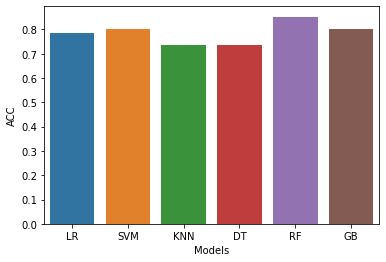

In [171]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [172]:
#so remember that we have use the train test plate just to evaluate the performance of our models but for production we have to tarin our model on entire data set.
#so lets train our best model on entire dataset, as you know that for this model this data set best model is random forest classifier.

In [173]:
X=data.drop('target',axis=1)
y=data['target']

In [174]:
X.shape

(302, 13)

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [177]:
#so as our randomforest classifier is train on your entire dataset

In [178]:
#so now we are going to perform prediction on new data with help pf our random forest classifier

In [179]:
import pandas as pd

In [180]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,   
},index=[0]) 

In [181]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [182]:
#as you can see over here with help of different features we are going predict our target to check whether patient is having heart disease or not?

In [184]:
p= rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease ") 

No Disease
